In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

%pylab inline

plt.style.use('bmh')
import sklearn.cluster as skc


Populating the interactive namespace from numpy and matplotlib


In [2]:
ship_df = pd.read_csv('../../Data/Furman_Center_SHIP_Properties.csv')
edu_df = pd.read_csv('../../Data/Furman_Center_Neighborhood_Educational_Attainment.csv')
homeowner_df = pd.read_csv('../../Data/Furman_Center_Neighborhood_Info_homeowner.csv')
burdened_df = pd.read_csv('../../Data/Furman_Center_Neighborhood_Info_cost_burdened.csv')

cd = gp.read_file('../../Data/community-districts-polygon.geojson')

In [3]:
#Patterns with or without violence
with_violations = ship_df[ship_df['Serious Violations Issued in 2010'] != 0]
without_violations = ship_df[ship_df['Serious Violations Issued in 2010'] == 0]

## Data Cleaning

In [4]:
ship_edu_df = pd.merge(ship_df, edu_df, left_on='CD', right_on='CommunityDistrict', how='inner')

In [5]:
ship_edu_time = ship_edu_df[['UID','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]

In [6]:
ship_edu_time = ship_edu_time.set_index('UID', drop = True)

In [7]:
ship_edu_time.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
UID,,,,,,,,,,,,,
100000,24.587999,24.074655,24.331679,27.259724,32.991513,37.704054,44.094062,47.775221,55.311595,66.209458,74.911028,43.660697,46.036099
100063,24.587999,24.074655,24.331679,27.259724,32.991513,37.704054,44.094062,47.775221,55.311595,66.209458,74.911028,43.660697,46.036099
100064,24.587999,24.074655,24.331679,27.259724,32.991513,37.704054,44.094062,47.775221,55.311595,66.209458,74.911028,43.660697,46.036099
100065,24.587999,24.074655,24.331679,27.259724,32.991513,37.704054,44.094062,47.775221,55.311595,66.209458,74.911028,43.660697,46.036099
100086,24.587999,24.074655,24.331679,27.259724,32.991513,37.704054,44.094062,47.775221,55.311595,66.209458,74.911028,43.660697,46.036099


In [8]:
ship_edu_mat = ship_edu_time.as_matrix()

## Data exploration

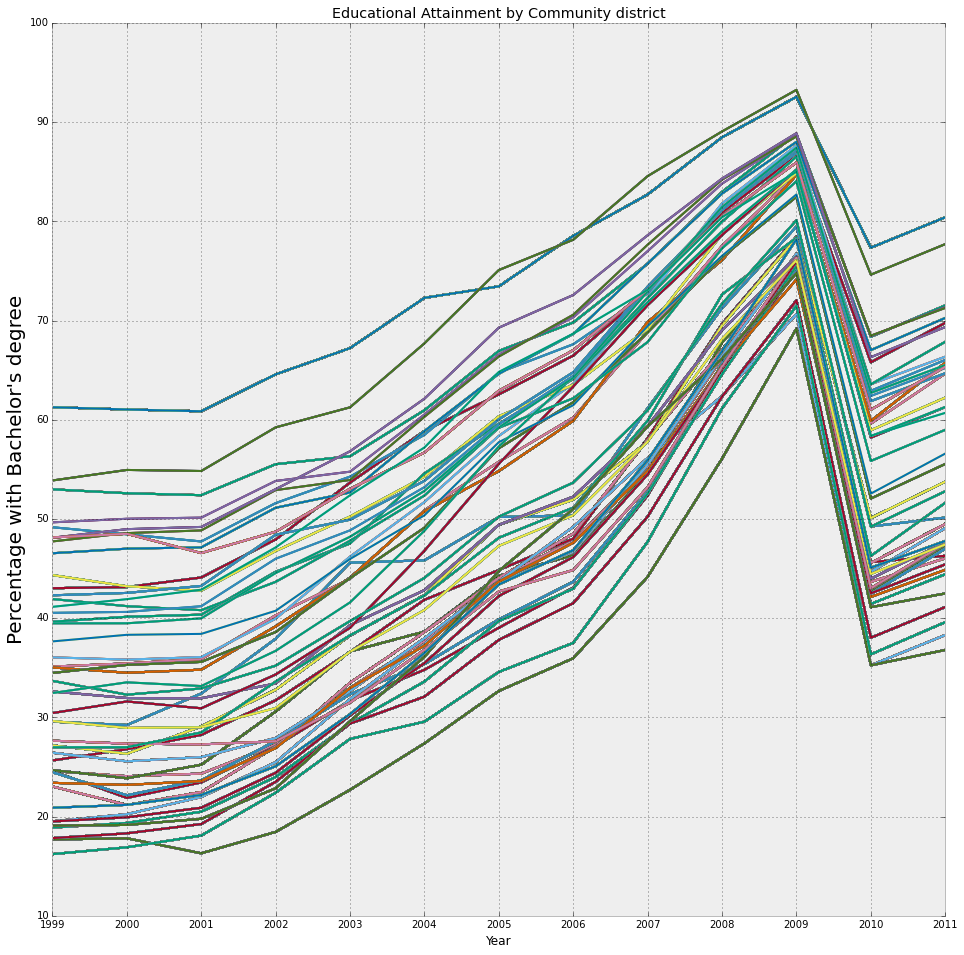

In [33]:
figure, ax = plt.subplots(figsize=(16,16))
ax.plot(ship_edu_mat.transpose())
ax.set_title('Educational Attainment by Community district')
ax.set_xticks(np.arange(13))
ax.set_xticklabels(1999 + np.arange(13))
ax.set_xlabel('Year')
ax.set_ylabel("Percentage with Bachelor's degree", fontsize = 20)
ax.legend()
figure.savefig('plot1.png')

## Normalizing data

In [10]:
temp = ship_edu_mat - (ship_edu_mat.sum(axis = 0))/(ship_edu_mat.shape[0])
norm_ship_edu_mat = temp/ship_edu_mat.std(axis = 0)

In [13]:
res = skc.KMeans(n_clusters=6).fit(norm_ship_edu_mat)

In [18]:
def plotClusters(clusters, labels):
    figure, ax = plt.subplots(figsize=(16,10))
    num_clusters = len(clusters)
    
    for i in range(num_clusters):
        ax.plot(norm_ship_edu_mat[labels == i].T)

    for i in range(num_clusters):
        ax.plot(clusters[i], label='Cluster %s' % i)

    ax.set_xlim([0,13])
    ax.set_title('Percent with Bachelore degree in NYC Clustered')
    ax.set_xticks(np.arange(13))
    ax.set_xticklabels(1999 + np.arange(13))
    ax.set_xlabel('Year')
    ax.set_ylabel('Normaized percent w/ bachelor degree')
    ax.legend()


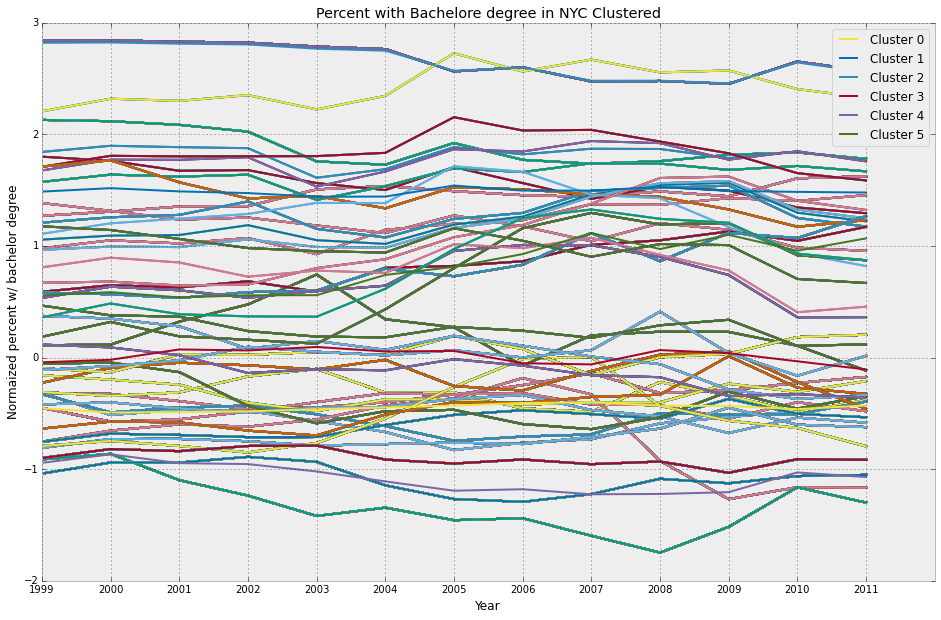

In [53]:
plotClusters(res.cluster_centers_, res.labels_)
plt.savefig('cluster.png')

In [22]:
ship_edu_time = ship_edu_df[['UID','CD','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]

In [40]:
#Formatting community distric code to be uniform in all datasets
ship_edu_time['CD'] = [i[0:4] for i in ship_edu_time['CD']]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
ship_edu_time['CD'] = [i.replace('MN','1') for i in ship_edu_time['CD']]
ship_edu_time['CD'] = [i.replace('BX','2') for i in ship_edu_time['CD']]
ship_edu_time['CD'] = [i.replace('BK','3') for i in ship_edu_time['CD']]
ship_edu_time['CD'] = [i.replace('QN','4') for i in ship_edu_time['CD']]
ship_edu_time['CD'] = [i.replace('ST','5') for i in ship_edu_time['CD']]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://panda

In [46]:
type(ship_edu_time['CD'][0])

str

In [45]:
cd['communityDistrict'] = cd['communityDistrict'].astype(str)